In [1]:
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/sf-crime/train.csv.zip
/kaggle/input/sf-crime/sampleSubmission.csv.zip
/kaggle/input/sf-crime/test.csv.zip


In [2]:
train_data=pd.read_csv('/kaggle/input/sf-crime/train.csv.zip')
test_data=pd.read_csv('/kaggle/input/sf-crime/test.csv.zip')

In [3]:
train_data.shape,test_data.shape

((878049, 9), (884262, 7))

In [4]:
train_data.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541


In [5]:
test_data.head()

,Id,Dates,DayOfWeek,PdDistrict,Address,X,Y
0,0,2015-05-10 23:59:00,Sunday,BAYVIEW,2000 Block of THOMAS AV,-122.399588,37.735051
1,1,2015-05-10 23:51:00,Sunday,BAYVIEW,3RD ST / REVERE AV,-122.391523,37.732432
2,2,2015-05-10 23:50:00,Sunday,NORTHERN,2000 Block of GOUGH ST,-122.426002,37.792212
3,3,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412
4,4,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412


In [6]:
train_data.nunique()

Dates         389257
Category          39
Descript         879
DayOfWeek          7
PdDistrict        10
Resolution        17
Address        23228
X              34243
Y              34243
dtype: int64

In [7]:
type(train_data.iloc[0,0])

str

In [8]:
train_data['Dates']=pd.to_datetime(train_data['Dates'])
test_data['Dates']=pd.to_datetime(test_data['Dates'])

In [9]:
train_data.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541


In [10]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878049 entries, 0 to 878048
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   Dates       878049 non-null  datetime64[ns]
 1   Category    878049 non-null  object        
 2   Descript    878049 non-null  object        
 3   DayOfWeek   878049 non-null  object        
 4   PdDistrict  878049 non-null  object        
 5   Resolution  878049 non-null  object        
 6   Address     878049 non-null  object        
 7   X           878049 non-null  float64       
 8   Y           878049 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(6)
memory usage: 60.3+ MB


In [11]:
train_data['month']=[x.month for x in train_data['Dates']]
test_data['month']=[x.month for x in test_data['Dates']]

In [12]:
train_data.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,month
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,5
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,5
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414,5
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873,5
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541,5


In [13]:
train_data['year']=[x.year for x in train_data['Dates']]
test_data['year']=[x.year for x in test_data['Dates']]

In [14]:
train_data.drop(['Dates','Descript','Resolution'],axis=1,inplace=True)
test_data.drop(['Dates'],axis=1,inplace=True)

In [15]:
train_data.head()

,Category,DayOfWeek,PdDistrict,Address,X,Y,month,year
0,WARRANTS,Wednesday,NORTHERN,OAK ST / LAGUNA ST,-122.425892,37.774599,5,2015
1,OTHER OFFENSES,Wednesday,NORTHERN,OAK ST / LAGUNA ST,-122.425892,37.774599,5,2015
2,OTHER OFFENSES,Wednesday,NORTHERN,VANNESS AV / GREENWICH ST,-122.424363,37.800414,5,2015
3,LARCENY/THEFT,Wednesday,NORTHERN,1500 Block of LOMBARD ST,-122.426995,37.800873,5,2015
4,LARCENY/THEFT,Wednesday,PARK,100 Block of BRODERICK ST,-122.438738,37.771541,5,2015


In [16]:
train_data.isnull().value_counts()

Category  DayOfWeek  PdDistrict  Address  X      Y      month  year 
False     False      False       False    False  False  False  False    878049
dtype: int64

In [17]:
train_data.head()

,Category,DayOfWeek,PdDistrict,Address,X,Y,month,year
0,WARRANTS,Wednesday,NORTHERN,OAK ST / LAGUNA ST,-122.425892,37.774599,5,2015
1,OTHER OFFENSES,Wednesday,NORTHERN,OAK ST / LAGUNA ST,-122.425892,37.774599,5,2015
2,OTHER OFFENSES,Wednesday,NORTHERN,VANNESS AV / GREENWICH ST,-122.424363,37.800414,5,2015
3,LARCENY/THEFT,Wednesday,NORTHERN,1500 Block of LOMBARD ST,-122.426995,37.800873,5,2015
4,LARCENY/THEFT,Wednesday,PARK,100 Block of BRODERICK ST,-122.438738,37.771541,5,2015


In [18]:
train_data.nunique()

Category         39
DayOfWeek         7
PdDistrict       10
Address       23228
X             34243
Y             34243
month            12
year             13
dtype: int64

In [19]:
train_data.drop('Address',inplace=True,axis=1)
test_data.drop('Address',inplace=True,axis=1)

In [20]:
train_data.head()

,Category,DayOfWeek,PdDistrict,X,Y,month,year
0,WARRANTS,Wednesday,NORTHERN,-122.425892,37.774599,5,2015
1,OTHER OFFENSES,Wednesday,NORTHERN,-122.425892,37.774599,5,2015
2,OTHER OFFENSES,Wednesday,NORTHERN,-122.424363,37.800414,5,2015
3,LARCENY/THEFT,Wednesday,NORTHERN,-122.426995,37.800873,5,2015
4,LARCENY/THEFT,Wednesday,PARK,-122.438738,37.771541,5,2015


In [21]:
test_data.head()

,Id,DayOfWeek,PdDistrict,X,Y,month,year
0,0,Sunday,BAYVIEW,-122.399588,37.735051,5,2015
1,1,Sunday,BAYVIEW,-122.391523,37.732432,5,2015
2,2,Sunday,NORTHERN,-122.426002,37.792212,5,2015
3,3,Sunday,INGLESIDE,-122.437394,37.721412,5,2015
4,4,Sunday,INGLESIDE,-122.437394,37.721412,5,2015


In [22]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878049 entries, 0 to 878048
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Category    878049 non-null  object 
 1   DayOfWeek   878049 non-null  object 
 2   PdDistrict  878049 non-null  object 
 3   X           878049 non-null  float64
 4   Y           878049 non-null  float64
 5   month       878049 non-null  int64  
 6   year        878049 non-null  int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 46.9+ MB


In [23]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 884262 entries, 0 to 884261
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Id          884262 non-null  int64  
 1   DayOfWeek   884262 non-null  object 
 2   PdDistrict  884262 non-null  object 
 3   X           884262 non-null  float64
 4   Y           884262 non-null  float64
 5   month       884262 non-null  int64  
 6   year        884262 non-null  int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 47.2+ MB


In [24]:
Y=train_data['Category']
train_data.drop('Category',inplace=True,axis=1)

In [25]:
train_data.head()

,DayOfWeek,PdDistrict,X,Y,month,year
0,Wednesday,NORTHERN,-122.425892,37.774599,5,2015
1,Wednesday,NORTHERN,-122.425892,37.774599,5,2015
2,Wednesday,NORTHERN,-122.424363,37.800414,5,2015
3,Wednesday,NORTHERN,-122.426995,37.800873,5,2015
4,Wednesday,PARK,-122.438738,37.771541,5,2015


In [26]:
test_data.head()

,Id,DayOfWeek,PdDistrict,X,Y,month,year
0,0,Sunday,BAYVIEW,-122.399588,37.735051,5,2015
1,1,Sunday,BAYVIEW,-122.391523,37.732432,5,2015
2,2,Sunday,NORTHERN,-122.426002,37.792212,5,2015
3,3,Sunday,INGLESIDE,-122.437394,37.721412,5,2015
4,4,Sunday,INGLESIDE,-122.437394,37.721412,5,2015


In [27]:
train_data['X']=round(train_data['X'],3)
test_data['X']=round(test_data['X'],3)
train_data['Y']=round(train_data['Y'],3)
test_data['Y']=round(test_data['Y'],3)

In [28]:
train_data.head()

,DayOfWeek,PdDistrict,X,Y,month,year
0,Wednesday,NORTHERN,-122.426,37.775,5,2015
1,Wednesday,NORTHERN,-122.426,37.775,5,2015
2,Wednesday,NORTHERN,-122.424,37.800,5,2015
3,Wednesday,NORTHERN,-122.427,37.801,5,2015
4,Wednesday,PARK,-122.439,37.772,5,2015


In [29]:
test_data.head()

,Id,DayOfWeek,PdDistrict,X,Y,month,year
0,0,Sunday,BAYVIEW,-122.400,37.735,5,2015
1,1,Sunday,BAYVIEW,-122.392,37.732,5,2015
2,2,Sunday,NORTHERN,-122.426,37.792,5,2015
3,3,Sunday,INGLESIDE,-122.437,37.721,5,2015
4,4,Sunday,INGLESIDE,-122.437,37.721,5,2015


In [30]:
for i in test_data.columns[1:]:
    test_data=pd.concat([test_data,pd.get_dummies(test_data[i])],axis=1)
    test_data.drop(i,axis=1,inplace=True)

In [31]:
test_data.head()

,Id,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,BAYVIEW,CENTRAL,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,1,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2,2,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,3,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,4,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [32]:
for i in train_data.columns:
    train_data=pd.concat([train_data,pd.get_dummies(train_data[i])],axis=1)
    train_data.drop(i,axis=1,inplace=True)

In [33]:
train_data.head()

,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,BAYVIEW,CENTRAL,INGLESIDE,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [34]:
test_data.shape,train_data.shape

((884262, 298), (878049, 296))

In [35]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 884262 entries, 0 to 884261
Columns: 298 entries, Id to 2015
dtypes: int64(1), uint8(297)
memory usage: 257.2 MB


In [36]:
test_data.head()

,Id,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,BAYVIEW,CENTRAL,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,1,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2,2,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,3,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,4,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [37]:
ids=test_data["Id"]
test_data=test_data[train_data.columns]
test_data.insert(0,'Id',ids)

In [38]:
test_data.head()

,Id,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,BAYVIEW,CENTRAL,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,1,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2,2,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,3,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,4,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [39]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 884262 entries, 0 to 884261
Columns: 297 entries, Id to 2015
dtypes: int64(1), uint8(296)
memory usage: 256.4 MB


In [40]:
Y.head()

0          WARRANTS
1    OTHER OFFENSES
2    OTHER OFFENSES
3     LARCENY/THEFT
4     LARCENY/THEFT
Name: Category, dtype: object

In [41]:
Y=pd.get_dummies(Y)

In [42]:
Y

,ARSON,ASSAULT,BAD CHECKS,BRIBERY,BURGLARY,DISORDERLY CONDUCT,DRIVING UNDER THE INFLUENCE,DRUG/NARCOTIC,DRUNKENNESS,EMBEZZLEMENT,...,SEX OFFENSES NON FORCIBLE,STOLEN PROPERTY,SUICIDE,SUSPICIOUS OCC,TREA,TRESPASS,VANDALISM,VEHICLE THEFT,WARRANTS,WEAPON LAWS
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
878044,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
878045,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
878046,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
878047,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [43]:
cols=Y.columns

In [44]:
cols

Index(['ARSON', 'ASSAULT', 'BAD CHECKS', 'BRIBERY', 'BURGLARY',
       'DISORDERLY CONDUCT', 'DRIVING UNDER THE INFLUENCE', 'DRUG/NARCOTIC',
       'DRUNKENNESS', 'EMBEZZLEMENT', 'EXTORTION', 'FAMILY OFFENSES',
       'FORGERY/COUNTERFEITING', 'FRAUD', 'GAMBLING', 'KIDNAPPING',
       'LARCENY/THEFT', 'LIQUOR LAWS', 'LOITERING', 'MISSING PERSON',
       'NON-CRIMINAL', 'OTHER OFFENSES', 'PORNOGRAPHY/OBSCENE MAT',
       'PROSTITUTION', 'RECOVERED VEHICLE', 'ROBBERY', 'RUNAWAY',
       'SECONDARY CODES', 'SEX OFFENSES FORCIBLE', 'SEX OFFENSES NON FORCIBLE',
       'STOLEN PROPERTY', 'SUICIDE', 'SUSPICIOUS OCC', 'TREA', 'TRESPASS',
       'VANDALISM', 'VEHICLE THEFT', 'WARRANTS', 'WEAPON LAWS'],
      dtype='object')

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
train_data

,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,BAYVIEW,CENTRAL,INGLESIDE,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
878044,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
878045,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
878046,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
878047,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
Y

,ARSON,ASSAULT,BAD CHECKS,BRIBERY,BURGLARY,DISORDERLY CONDUCT,DRIVING UNDER THE INFLUENCE,DRUG/NARCOTIC,DRUNKENNESS,EMBEZZLEMENT,...,SEX OFFENSES NON FORCIBLE,STOLEN PROPERTY,SUICIDE,SUSPICIOUS OCC,TREA,TRESPASS,VANDALISM,VEHICLE THEFT,WARRANTS,WEAPON LAWS
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
878044,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
878045,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
878046,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
878047,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [48]:
X_train,X_test,y_train,y_test=train_test_split(train_data,Y,train_size=0.5,test_size=0.2, random_state=41)

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
from sklearn.naive_bayes import BernoulliNB
import time

In [50]:
train_data.shape

(878049, 296)

In [51]:
from keras.layers import Dense,Dropout
from keras.models import Sequential

In [52]:
# model=Sequential()
# model.add(Dense(128,input_shape=(X_train.shape[1],)))
# model.add(Dense(128,activation='relu'))
# model.add(Dense(64,activation='relu'))
# model.add(Dense(64,activation='relu'))
# model.add(Dense(39,activation='softmax'))
# model.summary()
# model.compile(optimizer='adam',
#               loss='categorical_crossentropy',
#               metrics=['accuracy'])
model=Sequential()
model.add(Dense(128,input_shape=(X_train.shape[1],)))
model.add(Dense(128,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(39,activation='softmax'))
model.summary()
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               38016     
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_4 (Dense)              (None, 39)                5031      
Total params: 92,583
Trainable params: 92,583
Non-trainable params: 0
_________________________________________________________________


In [53]:
train=model.fit(x=X_train,y=y_train,batch_size=1000,epochs=10,verbose=2,validation_data=(X_test,y_test))

Epoch 1/10
440/440 - 7s - loss: 2.5909 - accuracy: 0.2372 - val_loss: 2.5181 - val_accuracy: 0.2518
Epoch 2/10
440/440 - 5s - loss: 2.4926 - accuracy: 0.2583 - val_loss: 2.4895 - val_accuracy: 0.2603
Epoch 3/10
440/440 - 5s - loss: 2.4684 - accuracy: 0.2644 - val_loss: 2.4730 - val_accuracy: 0.2640
Epoch 4/10
440/440 - 5s - loss: 2.4508 - accuracy: 0.2693 - val_loss: 2.4605 - val_accuracy: 0.2685
Epoch 5/10
440/440 - 5s - loss: 2.4375 - accuracy: 0.2723 - val_loss: 2.4552 - val_accuracy: 0.2704
Epoch 6/10
440/440 - 5s - loss: 2.4270 - accuracy: 0.2752 - val_loss: 2.4523 - val_accuracy: 0.2715
Epoch 7/10
440/440 - 5s - loss: 2.4181 - accuracy: 0.2771 - val_loss: 2.4437 - val_accuracy: 0.2735
Epoch 8/10
440/440 - 5s - loss: 2.4103 - accuracy: 0.2790 - val_loss: 2.4496 - val_accuracy: 0.2717
Epoch 9/10
440/440 - 5s - loss: 2.4036 - accuracy: 0.2806 - val_loss: 2.4398 - val_accuracy: 0.2735
Epoch 10/10
440/440 - 5s - loss: 2.3975 - accuracy: 0.2817 - val_loss: 2.4423 - val_accuracy: 0.2735

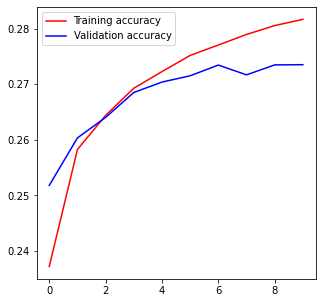

In [54]:
plt.figure(figsize=(5,5))
plt.plot(train.history['accuracy'],'r',label='Training accuracy')
plt.plot(train.history['val_accuracy'],'b',label='Validation accuracy')
plt.legend()

In [55]:
test_data.head()

,Id,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,BAYVIEW,CENTRAL,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,1,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2,2,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,3,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,4,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [56]:
test_data.head()
pred_final=model.predict(test_data.drop('Id',axis=1))
pred_final

array([[2.49724649e-03, 9.02920440e-02, 8.65564798e-05, ...,
        1.41866475e-01, 1.55930370e-02, 1.43740643e-02],
       [3.39979702e-03, 1.66853502e-01, 1.11855916e-04, ...,
        7.68654272e-02, 4.74095009e-02, 3.32219303e-02],
       [1.10461656e-03, 7.62139037e-02, 1.57731993e-04, ...,
        6.58325329e-02, 9.55943950e-03, 5.91234770e-03],
       ...,
       [2.71751406e-03, 1.03289187e-01, 9.24633001e-04, ...,
        2.10208029e-01, 3.15099731e-02, 9.73104034e-03],
       [3.76378908e-03, 1.23050660e-01, 3.52177798e-04, ...,
        8.11669976e-02, 1.05858974e-01, 2.75408346e-02],
       [8.21728609e-04, 4.59101982e-02, 1.72355084e-03, ...,
        5.40283509e-02, 4.21753600e-02, 3.76999006e-03]], dtype=float32)

In [57]:
submission = pd.DataFrame(data=pred_final,columns=y_train.columns)
submission.insert(0,'Id',ids)
submission.to_csv('../working/submission.csv', index=False)


In [58]:
submission.head()

,Id,ARSON,ASSAULT,BAD CHECKS,BRIBERY,BURGLARY,DISORDERLY CONDUCT,DRIVING UNDER THE INFLUENCE,DRUG/NARCOTIC,DRUNKENNESS,...,SEX OFFENSES NON FORCIBLE,STOLEN PROPERTY,SUICIDE,SUSPICIOUS OCC,TREA,TRESPASS,VANDALISM,VEHICLE THEFT,WARRANTS,WEAPON LAWS
0,0,0.002497,0.090292,0.000087,0.000467,0.052282,0.000464,0.001668,0.008177,0.000945,...,0.000196,0.005531,0.000368,0.039706,0.000001,0.003541,0.062477,0.141866,0.015593,0.014374
1,1,0.003400,0.166854,0.000112,0.001195,0.022367,0.001871,0.004809,0.031726,0.005428,...,0.000479,0.006133,0.000301,0.046866,0.000015,0.003882,0.051788,0.076865,0.047410,0.033222
2,2,0.001105,0.076214,0.000158,0.000149,0.068224,0.000868,0.001939,0.004482,0.001912,...,0.000059,0.007023,0.000347,0.032714,0.000001,0.005300,0.057655,0.065833,0.009559,0.005912
3,3,0.002858,0.167283,0.000049,0.000632,0.022071,0.000905,0.003600,0.014941,0.002886,...,0.000327,0.005589,0.000254,0.039551,0.000003,0.002313,0.067118,0.073118,0.030877,0.028534
4,4,0.002858,0.167283,0.000049,0.000632,0.022071,0.000905,0.003600,0.014941,0.002886,...,0.000327,0.005589,0.000254,0.039551,0.000003,0.002313,0.067118,0.073118,0.030877,0.028534


In [59]:
submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 884262 entries, 0 to 884261
Data columns (total 40 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Id                           884262 non-null  int64  
 1   ARSON                        884262 non-null  float32
 2   ASSAULT                      884262 non-null  float32
 3   BAD CHECKS                   884262 non-null  float32
 4   BRIBERY                      884262 non-null  float32
 5   BURGLARY                     884262 non-null  float32
 6   DISORDERLY CONDUCT           884262 non-null  float32
 7   DRIVING UNDER THE INFLUENCE  884262 non-null  float32
 8   DRUG/NARCOTIC                884262 non-null  float32
 9   DRUNKENNESS                  884262 non-null  float32
 10  EMBEZZLEMENT                 884262 non-null  float32
 11  EXTORTION                    884262 non-null  float32
 12  FAMILY OFFENSES              884262 non-null  float32
 13 